## Kernel Method For linearly inseprable data

**Motivation**
-  Classifiers with linear decision boundary cannot seperate positive and negative class very well.
-  Need to use the classifiers that can deal with the linearly inseprable data.
-  Use Kernel Method

### Working of Kernel Method
-  Create **non-linear combination** of the original features.
-  Transform the training data onto **higher-dimensional feature space** using a mapping function **𝜙**.
-  Train the linear SVM model to classify the data in this new higher dimensional feature space.
-  Use the sample **mapping function 𝜙** to transform new unseen data to classify it using the linear SVM model


### Disadvantages with Kernel Trick

-  Construction of the new features is computationally expensive.
-  Instead, use computationally less expensive kernel function.
-  Compute the distance between samples for the higher-dimensional feature space, 
   without ever actually computing the    higher-dimensional feature space.

### Kernel Method implementation

In [1]:
# Import modules
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd

In [34]:
# Load data and select features
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target


In [35]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [36]:
# Scale features using StandardScaler class in scikit-learn
sc = StandardScaler()
sc.fit(X_train)
# Transform (standardise) both X_train and X_test with mean and STD from# training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
#Train non-linear SVC with RBF kernel
svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
# Print accuracy computed from predictions on the train set
print('Training data accuracy: {0:.2f}'.format(svm.score(X_train_std, y_train)))

Training data accuracy: 0.96


In [39]:
# Print accuracy computed from predictions on the test set
print('Test data accuracy: {0:.2f}'.format(svm.score(X_test_std, y_test)))

Test data accuracy: 0.98


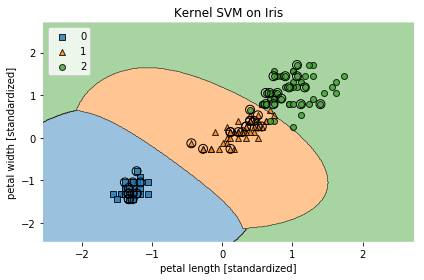

In [41]:
# Stack training and test data for plotting of decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,clf=svm,X_highlight=X_test_std)
plt.title('Kernel SVM on Iris')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()